# Imports

In [49]:
# pdf scanner
import PyPDF2
from pypdf import PdfReader
import pdfminer
# arrays
import pandas as pd
import numpy as np
# os
import os
# NLP
    # regex
import re
    # unicode
import unidecode
import wrangle as w

import statistics
# viz
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

import model as m

# keras
from keras.models import Sequential
from keras.layers import Dense

## ✅ Pulling Images (only required once)

In [2]:
# pulling images from pdf 

#w.pull_images(pdf='data.pdf')

# Retrieving data from all pdfs

## Not using isolated pdf version of retrieval

### Proceeding with compiled PDF, code remains for documentation purposes

In [3]:
bodies = w.pull_text(pdf='data.pdf')

Number of pages: 219
Page 1:
data.pdf
Successfully pulled text from page.

Page 2:
data.pdf
Successfully pulled text from page.

Page 3:
data.pdf
Successfully pulled text from page.

Page 4:
data.pdf
Successfully pulled text from page.

Page 5:
data.pdf
Successfully pulled text from page.

Page 6:
data.pdf
Successfully pulled text from page.

Page 7:
data.pdf
Successfully pulled text from page.

Page 8:
data.pdf
Successfully pulled text from page.

Page 9:
data.pdf
Successfully pulled text from page.

Page 10:
data.pdf
Successfully pulled text from page.

Page 11:
data.pdf
Successfully pulled text from page.

Page 12:
data.pdf
Successfully pulled text from page.

Page 13:
data.pdf
Successfully pulled text from page.

Page 14:
data.pdf
Successfully pulled text from page.

Page 15:
data.pdf
Successfully pulled text from page.

Page 16:
data.pdf
Successfully pulled text from page.

Page 17:
data.pdf
Successfully pulled text from page.

Page 18:
data.pdf
Successfully pulled text from page.

In [4]:
clean_body = w.clean_bodies(bodies)

In [5]:
# separating each entry by artist name
names = ['Zhang Daqian', 'Andy Warhol', 'Banksy', 'Salvador Dali','Marc Chagall','Pablo Picasso',
         'Rembrandt van Rijn','KAWS','Leonard Tsuguharu Foujita','Yayoi Kusama']
# container for all entries
new_body = []
# container for each artist that has multiple names in the entry
banksy_clean = []
marc_clean = []
pablo_clean = []
rembrandt_clean = []
dali_clean = []
kaws_clean = []
for body in clean_body :
    for name in names:

        # isolating the entries that contain multiple counts of name in entry
            # the text in the if statement is the combined text where the name is repeated
            # these varie between title of piece or within the lot description

        # KAWS
        if name == 'KAWS':
            if 'Banksy and 21st Century Editions' in body:
                kaws_clean.append(body)
        else:
            pass
                
        # Banksy 
        if name == 'Banksy':
            if 'Only Banksy' in body:
                banksy_clean.append(body)
            elif 'Banksy and 21st Century Editions' in body:
                banksy_clean.append(body)
        else:
            pass

        # Marc Chagall
        if name == 'Marc Chagall':
            if 'Colour of Life' in body:
                marc_clean.append(body)
            elif 'After Marc Chagall':
                marc_clean.append(body)
        else:
            pass

        # Dali
        if name == 'Salvador Dali':
            if 'After Salvador Dali' in body:
                dali_clean.append(body)
            elif 'SALVADOR DALI\' "Genesis"' in body:
                dali_clean.append(body)
            elif 'Currier & Ives as Interpreted by Salvador Dali' in body:
                dali_clean.append(body)
        else:
            pass
        
        # Picasso
        if name == 'Pablo Picasso':
            if 'After Pablo Picasso' in body:
                pablo_clean.append(body)

        # Rembrandt
        if name == 'Rembrandt van Rijn':
            if 'School of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Circle of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Studio of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Follower of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)

        # All other values that do not have repeated names
        else:
            entries = body.split(f"{name}")[1:]
        for entry in entries:
            entry = entry.strip()
            # adding an additional space back in between the name and piece_name
            a = ''.join([name+' ',entry])
            a = a.replace('\x00','-')
            new_body.append(a)
            print(a)
            print("="*30)


Banksy Sale Ends (V.2)screenprint in colors on wove paperHeight 56.01 x Width 76 cm.Height 22.05 x Width 29.92 in.2017Edition: Edition 238/50015 December 202211 months agoartnet AuctionsContemporary Finds - [Lot 138555]est. 20,000 u 30,000 USD30,000USD
Banksy Donuts (Strawberry)screenprint in coloursHeight 55.6 x Width 75.8 cm.Height 21.89 x Width 29.843 in.2009Edition: 281/29913 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00086]est. 20,000 u 30,000 GBP29,595GBPest. 24,749 u 37,124 USD36,622USD
Banksy Napalmscreenprint in coloursHeight 50 x Width 70 cm.Height 19.685 x Width 27.559 in.2005Edition: 58/15013 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00085]est. 20,000 u 30,000 GBP25,500GBPest. 24,749 u 37,124 USD31,555USD
Banksy NOLA (Green/Blue)screenprint in colorsHeight 76 x Width 56 cm.Height 29.921 x Width 22.047 in.2008Edition: AP aside from ed. 28913 December 202211 months agoForum AuctionsThe British Sale (with Dreweatts 1759) - [Lo

In [6]:
# Removing Marc Chagall due to complications with the data but also replacing
new_body = [entry for entry in new_body if 'Marc Chagall' not in entry]

## Isolated Lists of Entries that have the name of artist within the data.

### KAWS

In [7]:
kaws_ = w.kaws(kaws_clean)

### Banksy

In [8]:
banksy_ = w.banksy(banksy_clean)

### Rembrandt

In [9]:
rembrandt_ = w.rembrandt(rembrandt_clean)

### Marc Chagall

In [10]:
marc_ = w.marc(marc_clean)

### Pablo Picasso

In [11]:
pablo_ = w.pablo(pablo_clean)

### Salvador Dali

In [12]:
dali_ = w.dali(dali_clean)

## Connecting multiple name counts with the rest of values that did not need extra cleaning

In [13]:
# combing all cleaned entries
add_ins = dali_ + rembrandt_ + marc_ + pablo_ + banksy_ + kaws_
len(add_ins)

200

## Joining body with those that had multiple name entries bodies

In [14]:
new_body = w.add_ins(new_body,add_ins)

Before adding additional values: 950
After adding additional values: 1118
Some prep work before regex.
Before: 1118
After: 1065


### Counting multiple name artist entries

In [15]:
count_addins = {}
for artist in names:
    for body in add_ins:
        if artist in body:
            if artist in count_addins:
                count_addins[artist] += 1
            else:
                count_addins[artist] = 1

In [16]:
pd.DataFrame([count_addins], index=['count']).T.sort_values(by='count',ascending=False)

,count
Marc Chagall,100
Rembrandt van Rijn,40
Banksy,37
Pablo Picasso,15
Salvador Dali,8
KAWS,1


In [17]:
count_artist = {}
for artist in names:
    for body in new_body:
        if artist in body:
            if artist in count_artist:
                count_artist[artist] += 1
            else:
                count_artist[artist] = 1

In [18]:
# Data Frame to see distribution of a
pd.DataFrame([count_artist], index=['count']).T.sort_values(by='count',ascending=False)

,count
Rembrandt van Rijn,139
Banksy,122
Salvador Dali,103
Pablo Picasso,102
Zhang Daqian,100
Andy Warhol,100
Marc Chagall,100
KAWS,100
Leonard Tsuguharu Foujita,100
Yayoi Kusama,100


In [19]:
# seperating by IF has foreign currency
foreign_currency = ['HKD','EUR','NZD','AUD','GBP','KRW','CNY','JPY','CHF','SGD','CAD','TWD','INR','THB','RUB','SEK','DKK','NOK',
                    'PLN','ZAR','MXN','BRL','TRY','AED','SAR','QAR','KWD','OMR','BHD','JOD','ILS','EGP','IDR','MYR','PHP','CZK',
                    'HUF','CLP','ARS','COP','PEN']
# seperating by IF has depth
# Depth as a keyword

In [20]:
# new_body with foreign currency
has_foreign_currency = [body for body in new_body if any(currency in body for currency in foreign_currency)]

# new_body without foreign currency
no_foreign_currency = []
for body in new_body:
    if body not in has_foreign_currency:
        no_foreign_currency.append(body)

In [21]:
print(f'Length of FC: {len(has_foreign_currency)},\
 Length of No FC: {len(no_foreign_currency)},\
 Combined = {len(has_foreign_currency) + len(no_foreign_currency)}')

Length of FC: 793, Length of No FC: 272, Combined = 1065


# Regex

## Working with Foreign Currency Data

In [22]:
# Foreign currency values DataFrame
fc_df = w.regex_foreign_currency(has_foreign_currency)

In [23]:
# Non-Foreign currency values in DataFrame
no_fc_df = w.no_foreign_currency_regex(no_foreign_currency)

In [24]:
# Combining our seperate DataFrames
df = pd.concat([fc_df,no_fc_df])

In [25]:
# Cleaning data where necessary -- such as:
    # 1. Changing dtypes
    # 2. Fixing individual artists
    # 3. Dropping unused columns
    # 4. Fixing values of percent_estimate
    # 5. Fixing artist names
    # 6.
df = w.clean_prep_df(df)

In [26]:
df.isnull().sum()

artist                       0
dimension_in                 1
year_created                 0
date_sold                    0
auction_house                0
estimate_usd_low             0
estimate_usd_high            0
hammer_price                 0
percent_estimate             0
title_medium                 0
is_paper                     0
is_print                     0
is_sculpture                 0
is_canvas                    0
is_other_format              0
is_ink                       0
is_paint                     0
is_pencil                    0
is_pottery                   0
is_other_medium              0
month_sold                   0
height_in                    0
width_in                     0
is_sothebys                  0
is_christies                 0
is_phillips                  0
is_bonhams                   0
is_other_house               0
andy warhol                  0
banksy                       0
kaws                         0
leonard tsuguharu foujita    0
marc cha

In [27]:
df.head(2)

,artist,dimension_in,year_created,date_sold,auction_house,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,title_medium,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,Banksy,Height 21.89 x Width 29.843 in,2009.0,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,36622.0,0.0,Banksy Donuts (Strawberry)screenprint in colours,...,1,0,0,0,0,0,0,0,0,4.563742
1,Banksy,Height 19.685 x Width 27.559 in,2005.0,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,31555.0,0.0,Banksy Napalmscreenprint in colours,...,1,0,0,0,0,0,0,0,0,4.499068


In [28]:
df.columns

Index(['artist', 'dimension_in', 'year_created', 'date_sold', 'auction_house',
       'estimate_usd_low', 'estimate_usd_high', 'hammer_price',
       'percent_estimate', 'title_medium', 'is_paper', 'is_print',
       'is_sculpture', 'is_canvas', 'is_other_format', 'is_ink', 'is_paint',
       'is_pencil', 'is_pottery', 'is_other_medium', 'month_sold', 'height_in',
       'width_in', 'is_sothebys', 'is_christies', 'is_phillips', 'is_bonhams',
       'is_other_house', 'andy warhol', 'banksy', 'kaws',
       'leonard tsuguharu foujita', 'marc chagall', 'pablo picasso',
       'rembrandt van rijn', 'salvador dali', 'yayoi kusama', 'zhang daqian',
       'log_hammer_price'],
      dtype='object')

<Axes: ylabel='Frequency'>

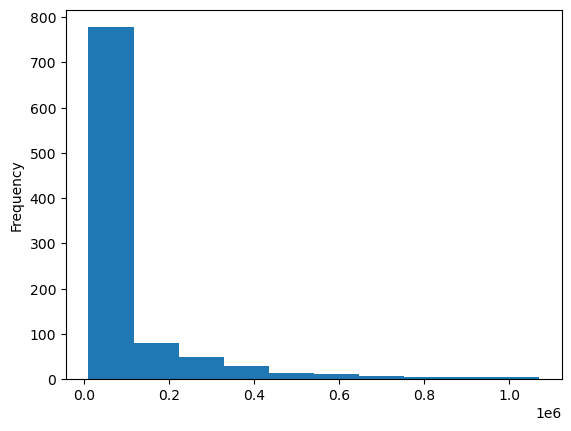

In [29]:
df.hammer_price.plot(kind='hist')

In [30]:
model_df, df_scaled = m.model_df(df)

Scaler with params of:
----
{'copy': True, 'with_mean': True, 'with_std': True}


<Axes: ylabel='Frequency'>

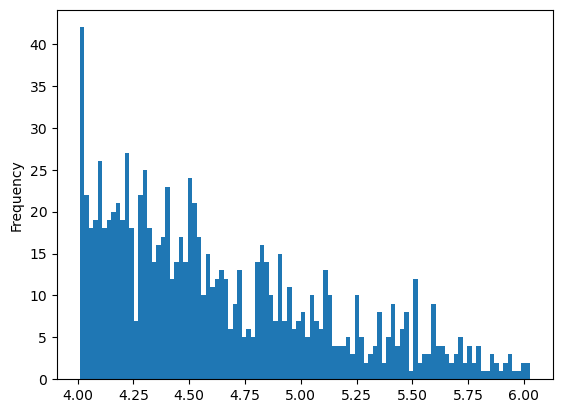

In [31]:
df.log_hammer_price.plot(kind='hist',bins=100)

<Axes: ylabel='Frequency'>

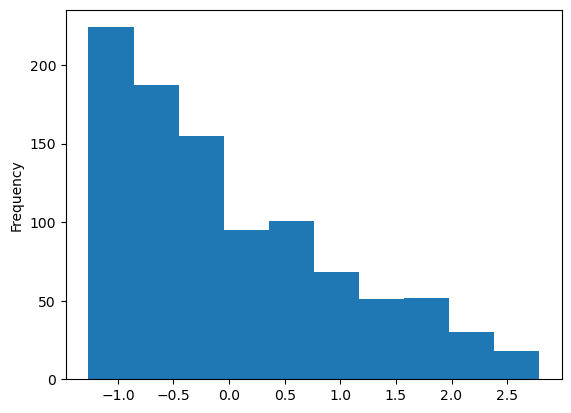

In [32]:
df_scaled.log_hammer_price.plot(kind='hist')

In [33]:
model_df.head()

,year_created,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,is_paper,is_print,is_sculpture,is_canvas,is_other_format,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,2009.0,24749.0,37124.0,36622.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.563742
1,2005.0,24749.0,37124.0,31555.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.499068
2,2008.0,148496.0,185620.0,136121.0,-8.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,5.133925
3,2003.0,19799.0,24749.0,24749.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.393558
4,2003.0,17071.0,21948.0,21338.0,0.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.329154


## Calculating average estimations

In [34]:
mean_estimate = df.percent_estimate.sum() / len(df.percent_estimate)
mean_estimate

51.17940876656473

## Baselines

In [35]:
df.hammer_price.mean()

95225.86544342508

In [36]:
df.hammer_price.median()

32366.0

In [37]:
train, validate, test = w.splitter(df_scaled)

Dataframe: (981, 34) 100%
Train: (588, 34) | ~60%
Validate: (196, 34) | ~20%
Test: (197, 34) | ~20%


In [38]:
x_train = train.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_validate = validate.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_test = test.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])

y_train = train[['log_hammer_price']]
y_validate = validate[['log_hammer_price']]
y_test = test[['log_hammer_price']]

In [39]:
log_price_mean = df.log_hammer_price.mean()
log_price_std = df.log_hammer_price.std()
price_mean = df.hammer_price.mean()
price_std = df.hammer_price.std()

In [40]:
# validate
validate_model_predictions = m.linear_regression_compiled(x_train, y_train, x_validate, y_validate, target_mean=log_price_mean
,target_std=log_price_std)

Best fit parameters (Determined by GridSearchCV): {'fit_intercept': False, 'n_jobs': -1}
Training MSE: 2533.12390165782, Training RMSE: 50.33014903274001, Training R^2: 0.4882514174457063
Test MSE: 3434.912466530776, Test RMSE: 58.60812628408091, Test R^2: 0.3805184084413812


In [41]:
# test
model_predictions_test = m.linear_regression_compiled(x_train, y_train, x_test, y_test,
                             target_mean=log_price_mean
                            ,target_std=log_price_std)

Best fit parameters (Determined by GridSearchCV): {'fit_intercept': False, 'n_jobs': -1}
Training MSE: 2533.12390165782, Training RMSE: 50.33014903274001, Training R^2: 0.4882514174457063
Test MSE: 2951.10994445907, Test RMSE: 54.32411936202068, Test R^2: 0.4395320450122878


In [42]:
model_predictions_test

array([[ 72.20985005],
       [ 65.77288346],
       [ 69.6449455 ],
       [ 63.45014078],
       [ 94.43402607],
       [164.46784761],
       [ 98.59984507],
       [145.98445384],
       [ 85.88249653],
       [ 94.71041624],
       [ 68.0438018 ],
       [ 63.43468974],
       [ 89.67790222],
       [108.70851103],
       [ 74.72576072],
       [ 94.29182771],
       [146.02603944],
       [190.68992546],
       [ 96.65027524],
       [113.40041314],
       [ 70.09588237],
       [ 93.87937606],
       [ 90.84157141],
       [ 99.53477036],
       [ 87.99443658],
       [ 88.01185062],
       [108.49691448],
       [ 94.41103   ],
       [ 81.16942518],
       [ 99.63178213],
       [ 89.67790222],
       [116.58943345],
       [141.88059711],
       [ 85.44697894],
       [169.81703119],
       [321.69352033],
       [ 69.05381135],
       [ 83.24652328],
       [102.41177775],
       [ 99.63178213],
       [ 89.94037213],
       [ 94.4527145 ],
       [ 68.81876497],
       [105

In [43]:
model_pred = pd.DataFrame(model_predictions_test)

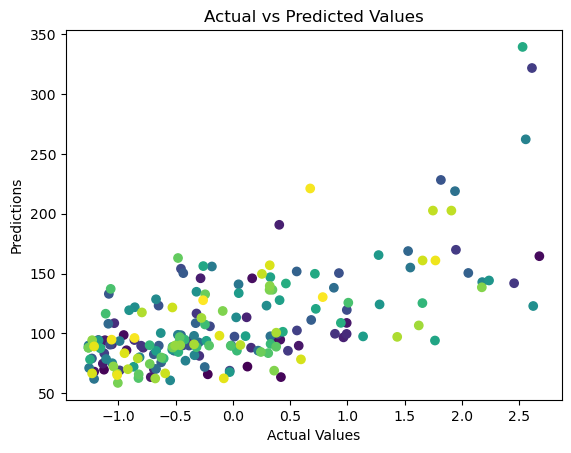

In [44]:
import matplotlib.pyplot as plt

# Create a scatter plot
colors = np.arange(len(model_pred))
plt.scatter(y_test, model_pred, c=colors)
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

In [48]:
model = Sequential()
model.add(Dense(10, input_dim=29))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 0s 774us/step - loss: 2.2566
Epoch 2/10
19/19 [==============================] - 0s 631us/step - loss: 1.9198
Epoch 3/10
19/19 [==============================] - 0s 647us/step - loss: 1.6692
Epoch 4/10
19/19 [==============================] - 0s 619us/step - loss: 1.4832
Epoch 5/10
19/19 [==============================] - 0s 625us/step - loss: 1.3368
Epoch 6/10
19/19 [==============================] - 0s 597us/step - loss: 1.2167
Epoch 7/10
19/19 [==============================] - 0s 602us/step - loss: 1.1218
Epoch 8/10
19/19 [==============================] - 0s 662us/step - loss: 1.0364
Epoch 9/10
19/19 [==============================] - 0s 630us/step - loss: 0.9650
Epoch 10/10
19/19 [==============================] - 0s 597us/step - loss: 0.9009
